In [45]:
import os
import cv2
#import PIL
#from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

folder_path = r"C:\Users\Srinivas\Desktop\Dataset_BUSI_with_GT\benign"

# create an empty dictionary to store the images
benign = []

# loop over the filenames in the folder
for filename in os.listdir(folder_path):
    # construct the full path to the file
    file_path = os.path.join(folder_path, filename)
    # load the image using OpenCV
    image = cv2.imread(file_path)
    image = cv2.resize(image, (500,500), interpolation=cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # add the image to the dictionary using the filename as the key
    benign.append(image)



# initialize an empty list to hold image labels
labels_benign = []

# loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # open the image using Pillow
        image = Image.open(os.path.join(folder_path, filename))
        # extract the file name (without the extension) and add it to the labels list
        label = os.path.splitext(filename)[0]
        labels_benign.append('benign')


###############################################################################


folder_path = r"C:\Users\Srinivas\Desktop\Dataset_BUSI_with_GT\malignant"

# create an empty dictionary to store the images
malignant = []

# loop over the filenames in the folder
for filename in os.listdir(folder_path):
    # construct the full path to the file
    file_path = os.path.join(folder_path, filename)
    # load the image using OpenCV
    image = cv2.imread(file_path)
    image = cv2.resize(image, (500,500), interpolation=cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # add the image to the dictionary using the filename as the key
    malignant.append(image)



# initialize an empty list to hold image labels
labels_mali = []

# loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # open the image using Pillow
        image = Image.open(os.path.join(folder_path, filename))
        # extract the file name (without the extension) and add it to the labels list
        label = os.path.splitext(filename)[0]
        labels_mali.append('malignant')


###############################################################################


folder_path = r"C:\Users\Srinivas\Desktop\Dataset_BUSI_with_GT\normal"

# create an empty dictionary to store the images
normal = []

# loop over the filenames in the folder
for filename in os.listdir(folder_path):
    # construct the full path to the file
    file_path = os.path.join(folder_path, filename)
    # load the image using OpenCV
    image = cv2.imread(file_path)
    image = cv2.resize(image, (500,500), interpolation=cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # add the image to the dictionary using the filename as the key
    normal.append(image)



# initialize an empty list to hold image labels
labels_norm = []

# loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # open the image using Pillow
        image = Image.open(os.path.join(folder_path, filename))
        # extract the file name (without the extension) and add it to the labels list
        label = os.path.splitext(filename)[0]
        labels_norm.append('normal')


#print(labels_norm)



images = []
for image_type in [benign, malignant, normal]:
    images += image_type
#print(images)


images_labels = []
for i in [labels_benign, labels_mali, labels_norm]:
    images_labels += i
#print(images_labels)

X= images

X = images
y = images_labels

import numpy as np

# Assume you have an image array of shape (num_samples, height, width)
# and you want to flatten it into an array of shape (num_samples, height * width)
image_array = np.random.rand(100, 28, 28)  # Example image array

num_samples, height, width = image_array.shape
flattened_array = image_array.reshape(num_samples, height * width)

# Now the flattened_array has shape (100, 784)'''



X = images
X = np.array([image.flatten() for image in images])
y = images_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)

# Print the number of input and output features
print("Number of input features:", X.shape[1])
print("Number of output features:", X_train_lda.shape[1])

# Compute the percentage of variance explained by the output feature
variance_explained = lda.explained_variance_ratio_[0]
print("Variance explained by LDA:", variance_explained)

# train a classifier
clf = SVC()
clf.fit(X_train_lda, y_train)

# test the classifier
accuracy = clf.score(X_test_lda, y_test)
print("Accuracy:", accuracy)


Number of input features: 250000
Number of output features: 2
Variance explained by LDA: 0.9968898912444762
Accuracy: 0.41455696202531644


In [48]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the labels to numeric labels
y1 = label_encoder.fit_transform(y)

# Print the mapping of categorical labels to numeric labels
print(dict(zip(y, y1)))

{'benign': 0, 'malignant': 1, 'normal': 2}


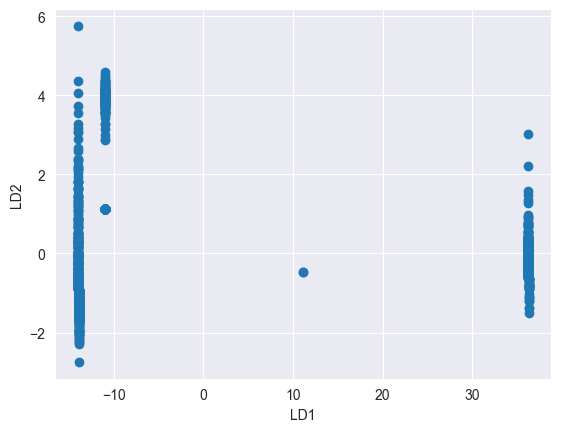

In [49]:
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

IGNORE

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for color, i, y in zip(colors, [0, 1, 2], y1):
    plt.scatter(X_train_lda[y == i, 0], X_train_lda[y == i, 1], color=color, alpha=.8, lw=2,
                label=y)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')
plt.show()

In [ ]:
image = cv2.imread("C:\\Users\\Srinivas\\Desktop\\Dataset_BUSI_with_GT\\benign\\benign (1).png")
image = cv2.resize(image, (500,500), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
woww = np.array([image.flatten()])
print(woww)
clf.predict(woww)
